In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

In [2]:
from utils_Tadpole import TadpoleSet, TadpoleSimple, Normalizer, train, val
with open('loaders', 'rb') as f:
    train_loader, val_loader, test_loader = pickle.load(f)

In [3]:
normalize = Normalizer(train_loader)
simple_model = TadpoleSimple(transforms=[])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simple_model.parameters(), lr=0.0001) # momentum=0.05)

In [4]:
train_losses = []
val_losses = []
corrects = []
for epoch in range(1, 300):
    train_loss = train(epoch, simple_model, train_loader, criterion, optimizer)
    val_loss, correct = val(simple_model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    corrects.append(correct)

Train Epoch: 1 [0/7123 (0.0%)]	Loss: 161298.5625
Train Epoch: 1 [640/7123 (8.928571428571429%)]	Loss: 162864.734375
Train Epoch: 1 [1280/7123 (17.857142857142858%)]	Loss: 159908.109375
Train Epoch: 1 [1920/7123 (26.785714285714285%)]	Loss: 139572.875
Train Epoch: 1 [2560/7123 (35.714285714285715%)]	Loss: 152347.0625
Train Epoch: 1 [3200/7123 (44.642857142857146%)]	Loss: 144782.890625
Train Epoch: 1 [3840/7123 (53.57142857142857%)]	Loss: 159428.25
Train Epoch: 1 [4480/7123 (62.5%)]	Loss: 181090.09375
Train Epoch: 1 [5120/7123 (71.42857142857143%)]	Loss: 166510.25
Train Epoch: 1 [5760/7123 (80.35714285714286%)]	Loss: 136495.984375
Train Epoch: 1 [6400/7123 (89.28571428571429%)]	Loss: 163839.90625
Train Epoch: 1 [7040/7123 (98.21428571428571%)]	Loss: 147644.28125

Val set: Average loss: 2288.6928, Accuracy: 277/890 (31%)

Train Epoch: 2 [0/7123 (0.0%)]	Loss: 145000.6875
Train Epoch: 2 [640/7123 (8.928571428571429%)]	Loss: 148054.578125
Train Epoch: 2 [1280/7123 (17.857142857142858%)]	Loss

In [5]:
train_losses[:10], val_losses[:10], corrects[:10]

([140157.703125,
  126016.3125,
  111883.921875,
  97755.171875,
  83628.3984375,
  69502.8515625,
  55378.17578125,
  50466.51953125,
  47002.23046875,
  43489.27734375],
 [2288.6927844101124,
  2035.8138606039327,
  1783.0714360955055,
  1530.385481039326,
  1277.7291871488765,
  1025.091959269663,
  772.4676439606742,
  698.4315506495786,
  650.5927010182585,
  602.0103427844101],
 [277, 277, 277, 277, 277, 277, 277, 272, 270, 271])

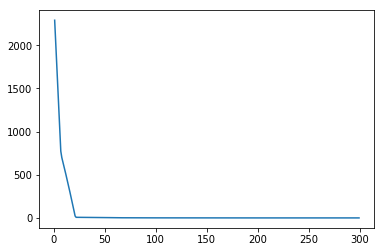

In [6]:
plt.plot(range(1, 300), val_losses)

In [7]:
torch.save(simple_model, 'simple_model')